In [ ]:
"""
Only use this if you are using Google Colab and want to save your model to Google Drive.
"""

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Importing the garbage collector module
import gc

# Loop through all objects managed by the garbage collector
for obj in gc.get_objects():
    try:fi
        # Check if the object is a PyTorch tensor and is stored in GPU memory
        if torch.is_tensor(obj) and obj.is_cuda:
            # If it's a GPU tensor, delete it to free up GPU memory
            del obj
    except Exception as e:
        # If any error occurs during the check, just pass and move to the next object
        pass


In [2]:
# Importing the PyTorch library
import torch

# Calling the empty_cache function from the cuda module
# This function releases all unused GPU memory cached by PyTorch, 
# ensuring that the GPU's memory is not unnecessarily occupied.
torch.cuda.empty_cache()


In [3]:
# Iterating through all local variables in the current scope.
for name, val in list(locals().items()):
    # Checking if the variable is a PyTorch tensor and is stored on the GPU (CUDA device).
    if torch.is_tensor(val) and val.is_cuda:
        # Printing the name of the variable that meets the above conditions.
        print(name)


In [4]:
# Calling the collect method to explicitly initiate garbage collection.
# This forces the release of unreferenced memory, which can be beneficial in certain cases 
# where objects are not being automatically deallocated as expected.
gc.collect()


0

In [5]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [6]:
import torch  # Importing the PyTorch library

# Calculate the total GPU memory (in MiB) that was allocated at some point by PyTorch.
# This will give us the peak GPU memory usage.
total_memory = torch.cuda.max_memory_allocated(device='cuda:0') / (1024**2)
print(f"Total Memory: {total_memory:.2f} MiB")  # Print the total allocated GPU memory.

# Calculate the current GPU memory (in MiB) being used by tensors.
used_memory = torch.cuda.memory_allocated(device='cuda:0') / (1024**2)
print(f"Used Memory: {used_memory:.2f} MiB")  # Print the currently used GPU memory.

# Calculate the difference between reserved memory and used memory 
# to determine the free GPU memory (in MiB).
free_memory = torch.cuda.memory_reserved(device='cuda:0') - torch.cuda.memory_allocated(device='cuda:0')
free_memory = free_memory / (1024**2)
print(f"Available Memory: {free_memory:.2f} MiB")  # Print the available GPU memory.


Total Memory: 0.00 MiB
Used Memory: 0.00 MiB
Available Memory: 0.00 MiB


In [8]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [9]:
# loading the data from drive
# labeled = pd.read_csv("/content/drive/MyDrive/final-project-OzodbekOzodov/Filtered_labels.csv")

# loading the data from relative path
labeled = pd.read_csv("src/Data/Filtered_labels.csv")
labeled.head()

,content,content_clean,sentiment
0,"More broadly, it justified taking steps toward...",broadly justified taking steps towards reducin...,Positive
1,Market stabilisation Once investors absorbed t...,market stabilisation investors absorbed full i...,Positive
2,FTD: The stress tests are very detailed in ter...,ftd stress tests detailed terms various exposu...,Positive
3,Economic and financial challenges While the re...,economic financial challenges recent news vacc...,Positive
4,Let me stress that governments and social part...,let stress governments social partners share r...,Positive


In [ ]:
labeled = labeled[['content', 'content_clean', 'sentiment']]
# the order of the data was not random, therefore we shuffle it before doing the
# rest of the steps

# shuffling the data
labeled = labeled.sample(frac=1, random_state = 1).reset_index(drop=True)

# choose the fraction in the range of (0,1] 
# if you want to use small fraction of the data for training if you want to just see how it works

labeled

,content,content_clean,sentiment
0,In this vein the banking union has to ensure a...,vein banking union ensure functioning european...,Positive
1,BIS Review 23/2003 We all know where all thi...,bis review 23 2003 know optimism “new economy”...,Positive
2,"Growth is projected to average -8% in 2020, 5%...",growth projected average 8 2020 5 2021 3 2 202...,Negative
3,BIS Review 8/2010 3 Question: Do you think ...,bis review 8 2010 3 question think that’s real...,Negative
4,"In fact, apart from theoretical considerations...",fact apart theoretical considerations economet...,Negative
...,...,...,...
2274,"On the fiscal side, the weakening of market di...",fiscal side weakening market discipline matche...,Positive
2275,We’ve ended up with the present inflation targ...,we’ve ended present inflation targeting regime...,Positive
2276,Its unemployment has fallen from close to 11% ...,unemployment fallen close 11 2005 4 today wors...,Negative
2277,The aim of SEPA is to make payments in euro mo...,aim sepa make payments euro efficient customer...,Positive


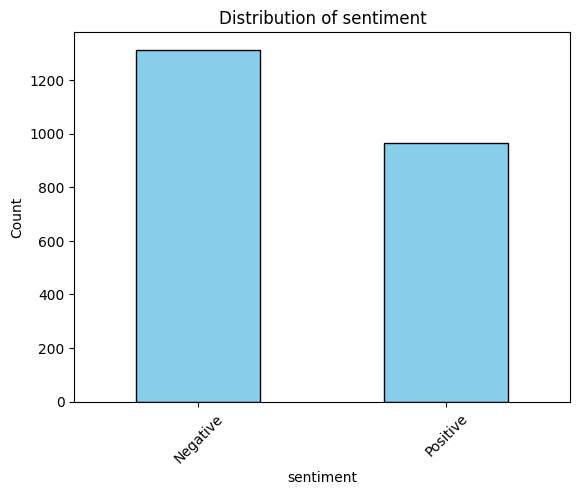

In [ ]:
import matplotlib.pyplot as plt

def plot_classes(df, column_name):
    """
    Plots the class distribution of a specified column in a DataFrame.

    Parameters:
    - df: The input DataFrame
    - column_name: The column whose distribution is to be plotted
    """
    class_counts = df[column_name].value_counts()
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Using the function to plot the class distribution of 'sentiment' in the labeled dataset
plot_classes(labeled, 'sentiment')


In [ ]:
df = labeled #.sample(n=100) # change it here to decrease the training size to save time and resources

In [ ]:
# set the numeric representation of classes
numerics = {"Negative":"1", "Positive":"0"}
# map them to respective classes
df["label_numeric"] = df["sentiment"].map(numerics)
# make sure they are integers
df['label_numeric'] = df['label_numeric'].astype(int)

In [ ]:
df['label_numeric'].value_counts()

1    1313
0     966
Name: label_numeric, dtype: int64

In [ ]:
# Get the lists of sentences and their labels.
sentences = df.content.values
labels = df.label_numeric.values

# Fine-tuning the BERT

In [2]:
# install necessary packages (this is for the use case of google colab)
# in the case of running on local machine, environment should take care of them all
# and there is no need to install them each one by one in this case

"""
!pip install transformers
!pip install datasets
!pip uninstall transformers accelerate -y
!pip install transformers[torch] accelerate
!pip install evaluate


"""



'\n!pip install transformers\n!pip install datasets\n!pip uninstall transformers accelerate -y\n!pip install transformers[torch] accelerate\n!pip install evaluate\n\n\n'

In [ ]:
from transformers import DistilBertTokenizer

# Initialize the DistilBERT tokenizer.
print('Initiating DistilBERT tokenizer...')
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased', do_lower_case=True)


Initiating DistilBERT tokenizer...


In [ ]:
# Print the original content
print('Content: ', sentences[0])

# Print the sentence split into tokens
print('Tokenized: ', tokenizer.tokenize(sentences[0]))

# Print the sentence mapped to token ID
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0])))

Content:  In this vein the banking union has to ensure a functioning European financial market, where banks are properly supervised and can be wound up efficiently if necessary. This will not only ensure greater integration and stability for the financial market. It also means putting EMU as a whole on a sounder footing. And for us as central bankers, this avoids compromising the primacy of price stability. Sound institutional framework and legal framework crucial for sound money and sound monetary policy The legal set-up of the European Economic and Monetary Union acknowledged that a sound institutional framework is conducive to a stable and prosperous economy. In fact, this is the spirit of the Freiburg School and its conception of “Ordnungspolitik” that puts strong emphasis on sound institutions as a pre-condition for sound money that underlie the construction of EMU. Indeed, it was one of the founding fathers of the Freiburg School, Walter Eucken, who has – in his book, “Grundsätze

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                           num_labels=2)

# Adjust the dropout
for layer in model.distilbert.transformer.layer:
    layer.attention.dropout.p = 0.4
    layer.ffn.dropout.p = 0.4


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# set baseline max_len
max_len = 0

# For every sentence...
for sent in sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (567 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  567


The Data cleaning step takes care of limiting the number of characters, therefore exceeding the maximum length must be not a common case

In [ ]:
# Map the tokens to the word IDs tokenizing the sentence
input_ids = []
attention_masks = []

# For every sentence...
for sent in sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 500,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )

    # Add the encoded sentence to the list.
    input_ids.append(encoded_dict['input_ids'])

    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Original:  In this vein the banking union has to ensure a functioning European financial market, where banks are properly supervised and can be wound up efficiently if necessary. This will not only ensure greater integration and stability for the financial market. It also means putting EMU as a whole on a sounder footing. And for us as central bankers, this avoids compromising the primacy of price stability. Sound institutional framework and legal framework crucial for sound money and sound monetary policy The legal set-up of the European Economic and Monetary Union acknowledged that a sound institutional framework is conducive to a stable and prosperous economy. In fact, this is the spirit of the Freiburg School and its conception of “Ordnungspolitik” that puts strong emphasis on sound institutions as a pre-condition for sound money that underlie the construction of EMU. Indeed, it was one of the founding fathers of the Freiburg School, Walter Eucken, who has – in his book, “Grundsätz

In [ ]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.75 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
torch.manual_seed(100)  # for reproducibility
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('Training set size: {:>5,}'.format(train_size))
print('Validation set size: {:>5,} '.format(val_size))

Training set size: 1,709
Validation set size:   570 


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# Specify the batch size (conventional size on huggingface is 32)
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# Training samples should be taken in random order
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset,
            sampler = SequentialSampler(val_dataset),
            batch_size = batch_size
        )

In [ ]:
from transformers import DistilBertConfig, DistilBertForSequenceClassification

config = DistilBertConfig.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2,
    finetuning_task="classification",
    dropout=0.4,  # dropout for DistilBERT
    seq_classif_dropout=0.4  # dropout for the sequence classification head
)

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    config=config
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 104 different named parameters.

==== Embedding Layer ====

distilbert.embeddings.word_embeddings.weight            (30522, 768)
distilbert.embeddings.position_embeddings.weight          (512, 768)
distilbert.embeddings.LayerNorm.weight                        (768,)
distilbert.embeddings.LayerNorm.bias                          (768,)
distilbert.transformer.layer.0.attention.q_lin.weight     (768, 768)

==== First Transformer ====

distilbert.transformer.layer.0.attention.q_lin.bias           (768,)
distilbert.transformer.layer.0.attention.k_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.k_lin.bias           (768,)
distilbert.transformer.layer.0.attention.v_lin.weight     (768, 768)
distilbert.transformer.layer.0.attention.v_lin.bias           (768,)
distilbert.transformer.layer.0.attention.out_lin.weight   (768, 768)
distilbert.transformer.layer.0.attention.out_lin.bias         (768,)
distilbert.transformer.layer.0.sa_layer_norm.weight           (

In [ ]:
from transformers import AdamW


optimizer = AdamW(model.parameters(),
                  lr = 0.00001, # args.learning_rate
                  eps = 1e-8, # args.adam_epsilon
                  no_deprecation_warning=True
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# change the number of epochs here if you want to save time and resources and just see if the code works
# in the case of changing it, the results in this notebook will be different than what it is saved in hugingface
# as the model was trained for 10 epochs 
epochs = 10

# Total number of training steps is [number of batches] x [number of epochs].
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))

    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [ ]:
model = model.to(device)


## Please run the following under higher GPU  availability. With simple CPU, it takes very long time to run, and might not even finish the training.

## Alternatively, you can browse to 2_using_model_from_web.ipynb file, and import it from the Huggingface. In this case, you can only take a look at the code down below to see how the process is carried out without running it all over.

In [ ]:
import random
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set random state for consistency
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store a number of quantities such as training and validation loss
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)

            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because
        # accumulating the gradients is "convenient while training RNNs".
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch).
        # In PyTorch, calling `model` will in turn call the model's `forward`
        # function and pass down the arguments. The `forward` function is
        # documented here:
        # https://huggingface.co/transformers/model_doc/bert.html#bertforsequenceclassification
        # The results are returned in a results object, documented here:
        # https://huggingface.co/transformers/main_classes/output.html#transformers.modeling_outputs.SequenceClassifierOutput
        # Specifically, we'll get the loss (because we provided labels) and the
        # "logits"--the model outputs prior to activation.
        # Perform a forward pass (evaluate the model on this training batch).
        result = model(b_input_ids,
               attention_mask=b_input_mask,
               labels=b_labels,
               return_dict=True)

        loss = result.loss
        logits = result.logits

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value
        # from the tensor.
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)

    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Time to train the epoch : {:}".format(training_time))

    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Evaluate the model with validation set...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:

        # Unpack this training batch from our dataloader.
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids
        #   [1]: attention masks
        #   [2]: labels
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        all_true_labels = []
        all_pred_labels = []

        with torch.no_grad():

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # Perform a forward pass (evaluate the model on this training batch).
            result = model(b_input_ids,
               attention_mask=b_input_mask,
               labels=b_labels,
               return_dict=True)



        loss = result.loss
        logits = result.logits

        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Convert logits to predictions
        pred_labels_i = np.argmax(logits, axis=1).flatten()

        all_true_labels.extend(label_ids)
        all_pred_labels.extend(pred_labels_i)

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)

        # Compute precision, recall, and F1 score
        # "macro" can be also changed into "micro" or "weighted" but we stick with this
        precision = precision_score(all_true_labels, all_pred_labels, average='weighted')
        recall = recall_score(all_true_labels, all_pred_labels, average='weighted')
        f1 = f1_score(all_true_labels, all_pred_labels, average='weighted')



    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)

    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))


    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Precision(V)': precision,
            'Recall(V)': recall,
            'F1 Score(V)': f1,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:20.

  Average training loss: 0.68
  Time to train the epoch : 0:00:26

Evaluate the model with validation set...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

  Accuracy: 0.59
  Validation Loss: 0.67
  Validation took: 0:00:03

======== Epoch 2 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:17.

  Average training loss: 0.68
  Time to train the epoch : 0:00:23

Evaluate the model with validation set...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  Accuracy: 0.60
  Validation Loss: 0.66
  Validation took: 0:00:03

======== Epoch 3 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:17.

  Average training loss: 0.66
  Time to train the epoch : 0:00:23

Evaluate the model with validation set...
  Accuracy: 0.62
  Validation Loss: 0.65
  Validation took: 0:00:03

======== Epoch 4 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:17.

  Average training loss: 0.65
  Time to train the epoch : 0:00:23

Evaluate the model with validation set...
  Accuracy: 0.63
  Validation Loss: 0.64
  Validation took: 0:00:03

======== Epoch 5 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:17.

  Average training loss: 0.64
  Time to train the epoch : 0:00:23

Evaluate the model with validation set...
  Accuracy: 0.64
  Validation Loss: 0.64
  Validation took: 0:00:03

======== Epoch 6 / 10 ========
Training...
  Batch    40  of     54.    Elapsed: 0:00:17.

  Average training loss: 0.63
  T

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('display.precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.iloc[:, :8]
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

latex_code = df_stats.to_latex()
# Display the table.
latex_code

<ipython-input-36-127dffb44fd4>:16: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df_stats.to_latex()


'\\begin{tabular}{lrrrrrrl}\n\\toprule\n{} &  Training Loss &  Valid. Loss &  Valid. Accur. &  Precision(V) &  Recall(V) &  F1 Score(V) & Training Time \\\\\nepoch &                &              &                &               &            &              &               \\\\\n\\midrule\n1     &           0.68 &         0.67 &           0.59 &          0.48 &       0.69 &         0.57 &       0:00:26 \\\\\n2     &           0.68 &         0.66 &           0.60 &          0.48 &       0.69 &         0.57 &       0:00:23 \\\\\n3     &           0.66 &         0.65 &           0.62 &          0.76 &       0.77 &         0.76 &       0:00:23 \\\\\n4     &           0.65 &         0.64 &           0.63 &          0.71 &       0.73 &         0.71 &       0:00:23 \\\\\n5     &           0.64 &         0.64 &           0.64 &          0.80 &       0.81 &         0.80 &       0:00:23 \\\\\n6     &           0.63 &         0.63 &           0.65 &          0.81 &       0.81 &         0.79 &     

In [3]:
# only when running on colab
# !pip install matplotlib

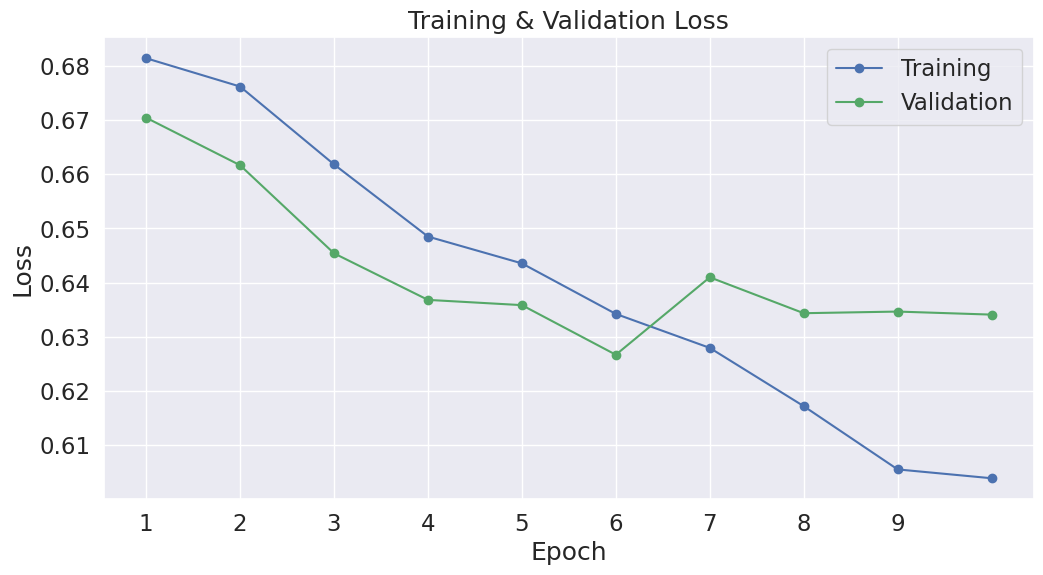

In [ ]:
import matplotlib.pyplot as plt
# % matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks(range(1,10))

plt.show()

In [ ]:
# this step has been done to save the model for uploading it to the huggingface

%cd /content/drive/MyDrive/final-project-OzodbekOzodov

/content/drive/MyDrive/final-project-OzodbekOzodov


In [ ]:
dir = "/content/drive/MyDrive/final-project-OzodbekOzodov"
model.save_pretrained(dir)

In [ ]:
# the model can be found from the link below
# https://huggingface.co/OOzodbek/distilbert-for-monetary-policy

Although the model is not entirely ready for, let's say production-level use, the primary task was to take the first steps towards training, evaluating and deploying such models. The steps above covers all the steps, with quality being not the highest possible in terms of data used for training the model, as well as computational resources spent for training it. Now the model is ready to be uploaded in different notebook. Please make sure that the same model can not uploaded from huggingface in the same environment it's been created, therefore take a look at using_model_from_web.ipynb file in the repository to test it. All the steps regarding basic use of the model are already included for presentation purposes.